In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv("Dataset/train_ext_fe_imputed.csv")
test = pd.read_csv("Dataset/test_ext_fe.csv")

In [3]:
ids = test["id"]
test = test.drop("id", axis=1)
train = train.drop(['hari', 'hour_group', 'is_weekend'], axis=1)

train = train.drop(["id_titik_mulai_id_titik_akhir", "Date"], axis=1)
test = test.drop(["id_titik_mulai_id_titik_akhir", "Date"], axis=1)

In [4]:
train["node_awal_ways-node_akhir_ways"] = train["node_awal_ways"] - train["node_akhir_ways"]
test["node_awal_ways-node_akhir_ways"] = test["node_awal_ways"] - test["node_akhir_ways"]

In [5]:
train.shape, test.shape

((493152, 21), (127489, 20))

In [6]:
train.head()

,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,road_node,...,type_highway,id_jalan_first,id_jalan_last,id_titik_mulai_last3,id_titik_akhir_last3,id_titik_mulai_last2,id_titik_akhir_last2,Day,id_jalan_id_titik_mulai_id_titik_akhir,node_awal_ways-node_akhir_ways
0,691007296.0,21390008.0,1.425033e+09,29.126,0,Road,3.0,3.0,13.0,5.0,...,trunk,6.0,6.0,8.0,102.0,8.0,2.0,Saturday,691007296_21390008_1425033102,0.0
1,691007296.0,21390008.0,1.425033e+09,29.126,1,Road,3.0,3.0,13.0,5.0,...,trunk,6.0,6.0,8.0,102.0,8.0,2.0,Saturday,691007296_21390008_1425033102,0.0
2,691007296.0,21390008.0,1.425033e+09,34.772,2,Road,3.0,3.0,13.0,5.0,...,trunk,6.0,6.0,8.0,102.0,8.0,2.0,Saturday,691007296_21390008_1425033102,0.0
3,691007296.0,21390008.0,1.425033e+09,34.161,3,Road,3.0,3.0,13.0,5.0,...,trunk,6.0,6.0,8.0,102.0,8.0,2.0,Saturday,691007296_21390008_1425033102,0.0
4,691007296.0,21390008.0,1.425033e+09,39.383,4,Road,3.0,3.0,13.0,5.0,...,trunk,6.0,6.0,8.0,102.0,8.0,2.0,Saturday,691007296_21390008_1425033102,0.0


In [7]:
test.head()

,id_jalan,id_titik_mulai,id_titik_akhir,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,type_highway,id_jalan_first,id_jalan_last,id_titik_mulai_last3,id_titik_akhir_last3,id_titik_mulai_last2,id_titik_akhir_last2,Day,id_jalan_id_titik_mulai_id_titik_akhir,node_awal_ways-node_akhir_ways
0,4004732,32046542,6454026544,0,West,3.0,3.0,9,7,30,trunk,4,2,542,544,42,44,Sunday,4004732_32046542_6454026544,0.0
1,182210371,1314925464,1314925496,0,Side,2.0,2.0,13,11,30,trunk,1,1,464,496,64,96,Sunday,182210371_1314925464_1314925496,0.0
2,22932408,1482086782,26481020,0,Lane,2.0,2.0,4,62,20,secondary,2,8,782,20,82,20,Sunday,22932408_1482086782_26481020,0.0
3,182210371,3892883,267337489,0,Side,2.0,2.0,13,11,30,trunk,1,1,883,489,83,89,Sunday,182210371_3892883_267337489,0.0
4,66924592,266041030,2592978110,0,Road,2.0,3.0,25,34,30,trunk,6,2,30,110,30,10,Sunday,66924592_266041030_2592978110,-1.0


<AxesSubplot:xlabel='id_jalan_first', ylabel='rerata_kecepatan'>

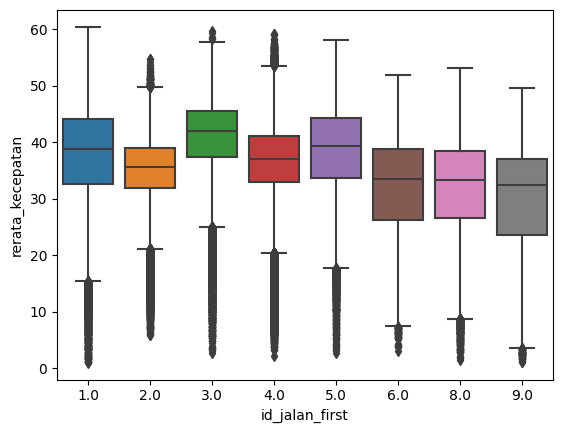

In [8]:
sns.boxplot(data=train, x="id_jalan_first", y="rerata_kecepatan")

Text(0.5, 1.0, 'Distribusi kecepatan id_titik_akhir_last2')

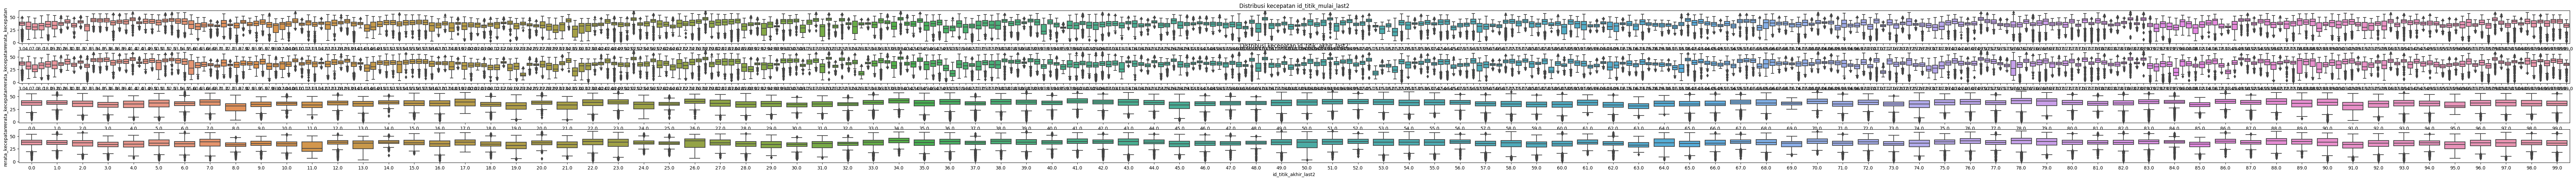

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(100, 6))

sns.boxplot(data=train, x="id_titik_mulai_last3", y="rerata_kecepatan", ax=axes[0])
axes[0].set_title("Distribusi kecepatan id_titik_mulai_last3")

sns.boxplot(data=train, x="id_titik_akhir_last3", y="rerata_kecepatan", ax=axes[1])
axes[1].set_title("Distribusi kecepatan id_titik_akhir_last3")

sns.boxplot(data=train, x="id_titik_mulai_last2", y="rerata_kecepatan", ax=axes[2])
axes[0].set_title("Distribusi kecepatan id_titik_mulai_last2")

sns.boxplot(data=train, x="id_titik_akhir_last2", y="rerata_kecepatan", ax=axes[3])
axes[1].set_title("Distribusi kecepatan id_titik_akhir_last2")

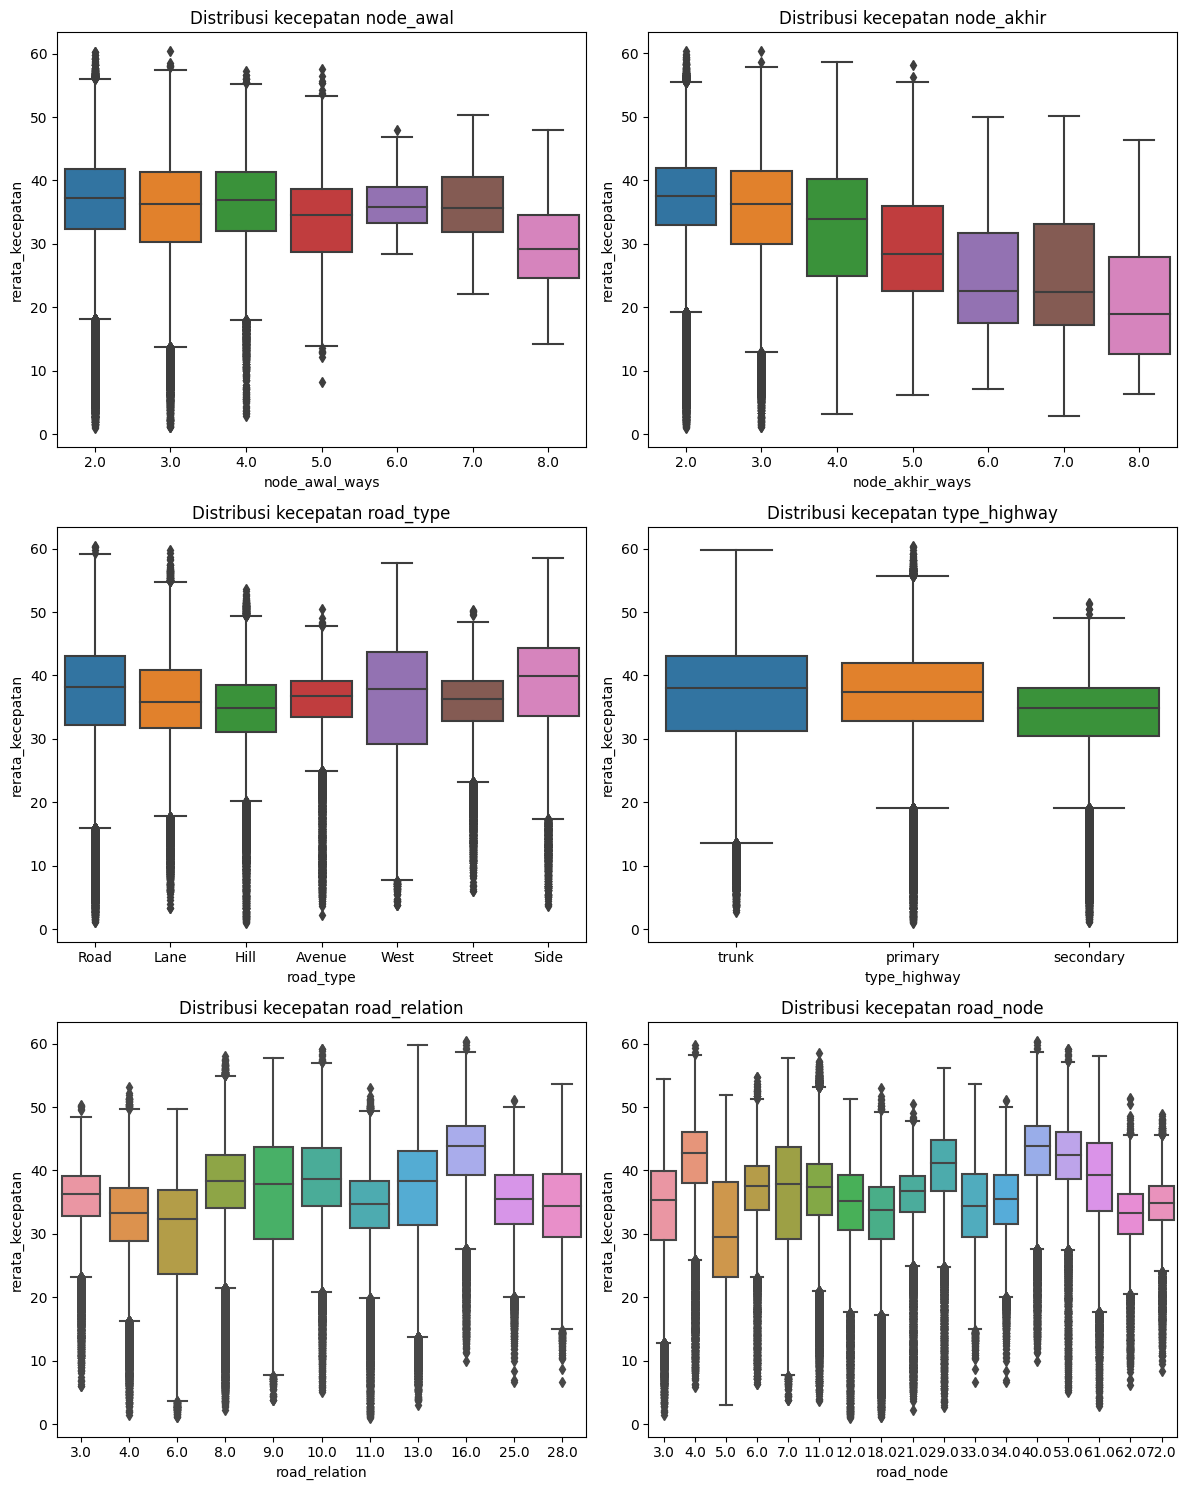

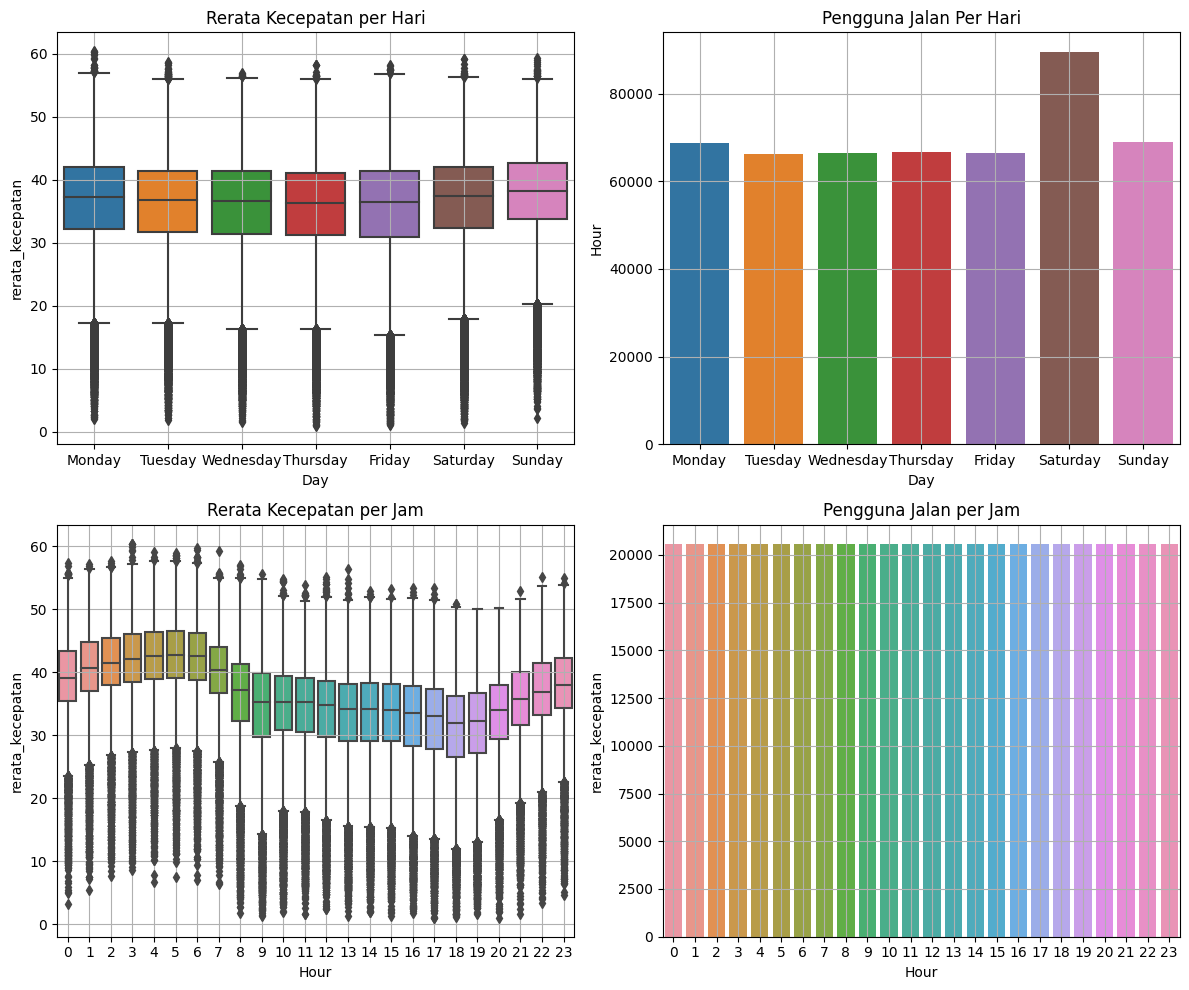

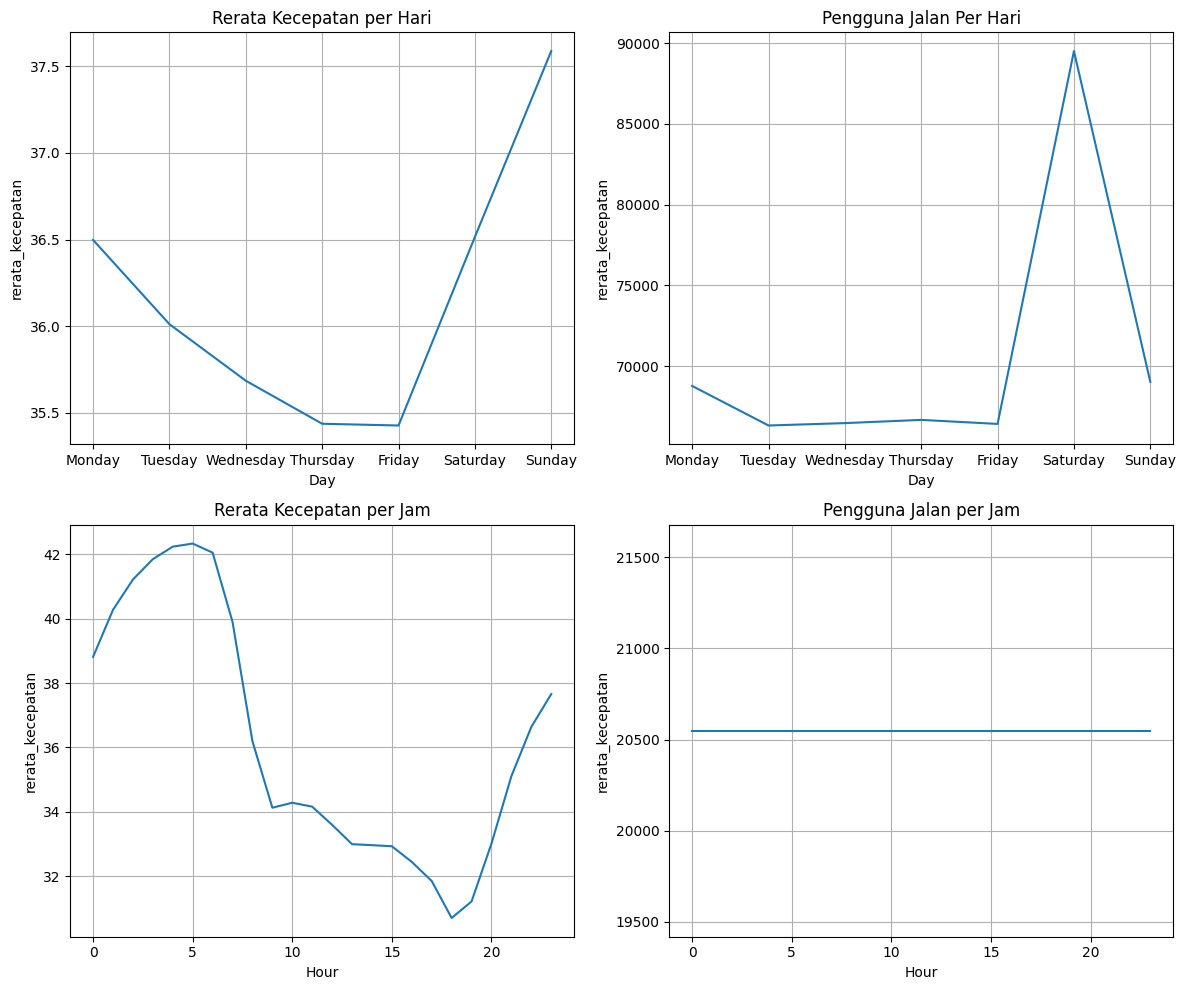

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Subplot 1: Distribusi kecepatan node_awal
sns.boxplot(data=train, x="node_awal_ways", y="rerata_kecepatan", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi kecepatan node_awal")

# Subplot 2: Distribusi kecepatan node_akhir
sns.boxplot(data=train, x="node_akhir_ways", y="rerata_kecepatan", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi kecepatan node_akhir")

# Subplot 3: Distribusi kecepatan road_type
sns.boxplot(data=train, x="road_type", y="rerata_kecepatan", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi kecepatan road_type")

# Subplot 4: Distribusi kecepatan type_highway
sns.boxplot(data=train, x="type_highway", y="rerata_kecepatan", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi kecepatan type_highway")

# Subplot 5: Distribusi kecepatan road_relation
sns.boxplot(data=train, x="road_relation", y="rerata_kecepatan", ax=axes[2, 0])
axes[2, 0].set_title("Distribusi kecepatan road_relation")

# Subplot 6: Distribusi kecepatan road_node
sns.boxplot(data=train, x="road_node", y="rerata_kecepatan", ax=axes[2, 1])
axes[2, 1].set_title("Distribusi kecepatan road_node")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Step 1: Group data by "Day" and calculate the mean and count for each day
grouped_data = train.groupby("Day").agg({"rerata_kecepatan": "mean", "Hour": "count"})
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorted_grouped_data = grouped_data.reindex(desired_order)

# Create the figure and subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Rerata Kecepatan per Hari
plt.subplot(2, 2, 1)
plt.title("Rerata Kecepatan per Hari")
sns.boxplot(data=train, x="Day", y="rerata_kecepatan", order=desired_order)
plt.grid()

# Subplot 2: Pengguna Jalan Per Hari
plt.subplot(2, 2, 2)
plt.title("Pengguna Jalan Per Hari")
sns.barplot(data=sorted_grouped_data, x=sorted_grouped_data.index, y="Hour", order=desired_order)
plt.grid()

# Subplot 3: Rerata Kecepatan per Jam
plt.subplot(2, 2, 3)
plt.title("Rerata Kecepatan per Jam")
sns.boxplot(data=train, x="Hour", y="rerata_kecepatan")
plt.grid()

# Subplot 4: Pengguna Jalan per Jam
plt.subplot(2, 2, 4)
plt.title("Pengguna Jalan per Jam")
sns.barplot(data=train.groupby("Hour").count().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

plt.tight_layout()
plt.show()

# Step 1: Group data by "Day" and calculate the mean and count for each day
grouped_data_mean = train.groupby("Day").mean()
grouped_data_count = train.groupby("Day").count()

# Step 2: Define the desired order of days
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Step 3: Sort the index using the desired order
sorted_grouped_data_mean = grouped_data_mean.reindex(desired_order)
sorted_grouped_data_count = grouped_data_count.reindex(desired_order)

# Create the figure and subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Rerata Kecepatan per Hari
plt.subplot(2, 2, 1)
plt.title("Rerata Kecepatan per Hari")
sns.lineplot(data=sorted_grouped_data_mean, x=sorted_grouped_data_mean.index, y="rerata_kecepatan")
plt.grid()

# Subplot 2: Pengguna Jalan Per Hari
plt.subplot(2, 2, 2)
plt.title("Pengguna Jalan Per Hari")
sns.lineplot(data=sorted_grouped_data_count, x=sorted_grouped_data_count.index, y="rerata_kecepatan")
plt.grid()

# Subplot 3: Rerata Kecepatan per Jam
plt.subplot(2, 2, 3)
plt.title("Rerata Kecepatan per Jam")
sns.lineplot(data=train.groupby("Hour").mean().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

# Subplot 4: Pengguna Jalan per Jam
plt.subplot(2, 2, 4)
plt.title("Pengguna Jalan per Jam")
sns.lineplot(data=train.groupby("Hour").count().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

plt.tight_layout()
plt.show()

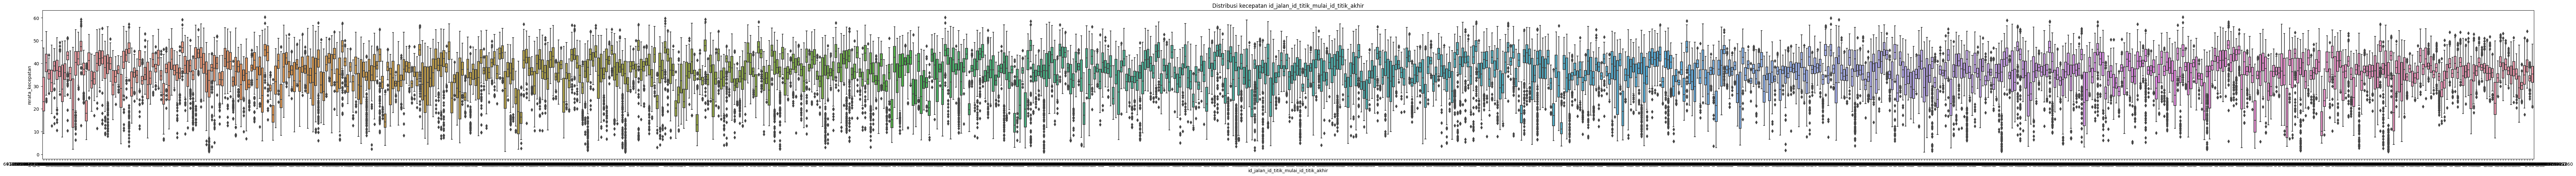

In [11]:
plt.figure(figsize=(100,6))
plt.title("Distribusi kecepatan id_jalan_id_titik_mulai_id_titik_akhir")
sns.boxplot(data=train, x="id_jalan_id_titik_mulai_id_titik_akhir", y="rerata_kecepatan")
plt.show()

In [12]:
train = train.fillna(0)
test = test.fillna(0)

In [13]:
cat_columns = ['id_jalan', 'id_titik_mulai', 'id_titik_akhir', 'road_type', 'node_awal_ways', 'node_akhir_ways', 'type_highway', 'id_titik_mulai_last3',
       'id_titik_akhir_last3', 'id_titik_mulai_last2', 'id_titik_akhir_last2', "Day", "id_jalan_id_titik_mulai_id_titik_akhir"]

In [14]:
train[cat_columns] = train[cat_columns].astype(str)
test[cat_columns] = test[cat_columns].astype(str)

In [15]:
X = train.drop("rerata_kecepatan", axis=1)
y = train["rerata_kecepatan"]

In [16]:
clf = cb.CatBoostRegressor(
    iterations=3000,
    verbose=1000,
    depth=8,
    learning_rate=0.5,
    loss_function="MAPE",
    task_type="GPU"
)

In [17]:
clf.fit(X, y, cat_features=cat_columns)

0:	learn: 0.2287243	total: 121ms	remaining: 6m 3s
1000:	learn: 0.1169144	total: 1m 46s	remaining: 3m 32s
2000:	learn: 0.1039780	total: 3m 46s	remaining: 1m 53s
2999:	learn: 0.0981008	total: 5m 39s	remaining: 0us


In [18]:
y_pred = clf.predict(test)

In [19]:
submission = pd.DataFrame({'id': ids, 'rerata_kecepatan': y_pred})
submission

,id,rerata_kecepatan
0,0,39.672231
1,1,39.321907
2,2,32.970051
3,3,39.563677
4,4,32.404268
...,...,...
127484,127484,27.876908
127485,127485,30.304473
127486,127486,38.204804
127487,127487,29.457828


In [20]:
submission.to_csv("Submission/cb_fe_impute_last.csv", index=False)

In [21]:
# bestTest = 0.08751610495 (46853, 8, 0.5)
# bestTest = 0.08603526873 (44227, 10, 0.5)
# bestTest = 0.0857089954 (19168, 12, 0.5)
# bestTest = 0.08487705426 (13153, 14, 0.5)